In [16]:
from _HyperSBM import *
from _HyperCommunityDetection import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from scipy.special import comb
from _CommunityDetect import *
from spectralOperator import BetheHessian
# from EXPERIMENT_2orderHYPERGRAPH import *
from EXPERIMENT_HYPER import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

# Uniform case


In [43]:
n = 100
q = 2
d = 10
Ks = (3, )
addtionTag = ""
fileId = 'amiExpHyper24.6.29' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH{addtionTag}'
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
add_fileId1 = 'amiExpHyper24.6.29' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH_40more'
add_paths = ["./result/detectabilityHyper/" + add_fileId + ".txt" for add_fileId in [add_fileId1]]
epsilons, results = read_exp(load_path=load_path, add_paths=add_paths)

Additional result adding...


In [44]:
e = (np.sqrt(d * (Ks[0] - 1)) - 1) / (np.sqrt(d * (Ks[0] - 1)) + q - 1)
crit_epsilon = e / (q**(Ks[0] - 2) - (q**(Ks[0] - 2) - 1) * e)
print(crit_epsilon)

0.4646778345456075


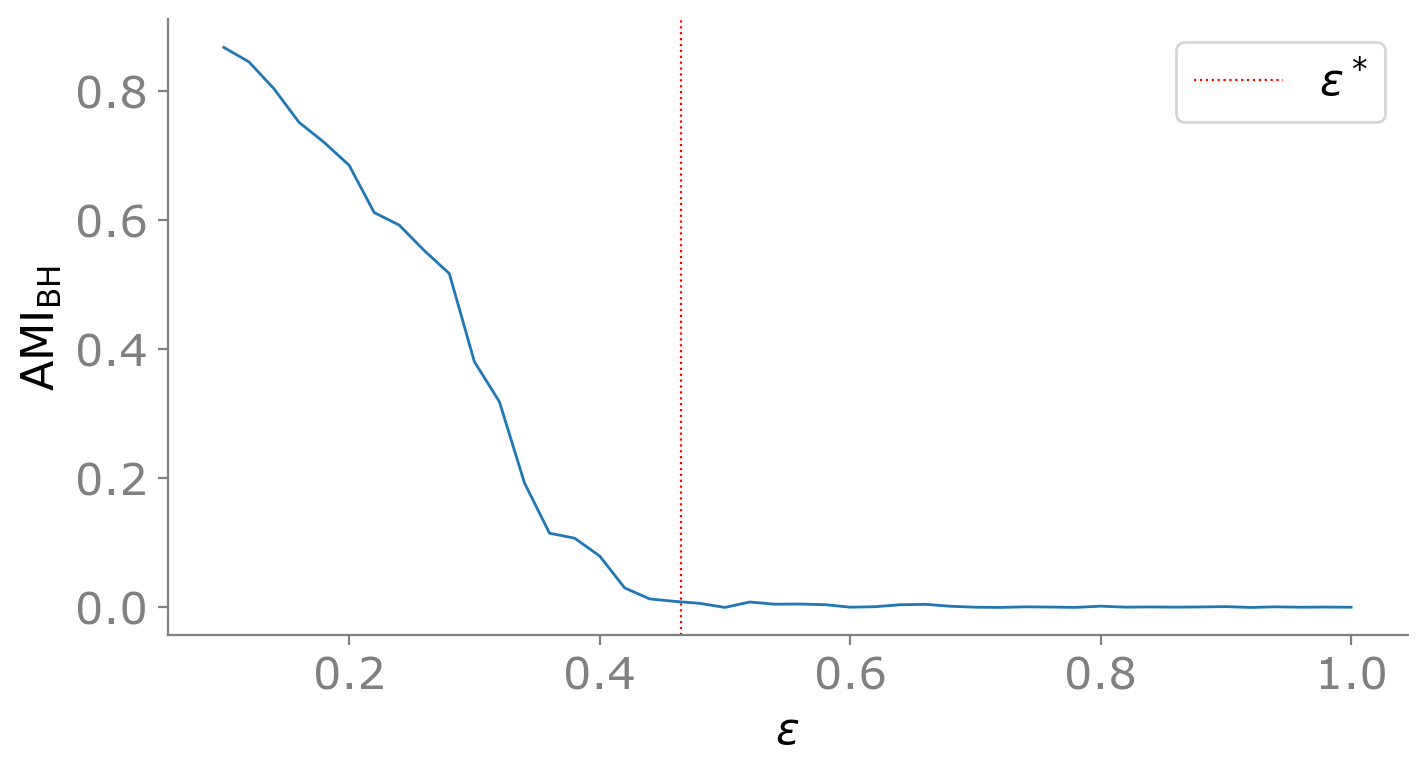

In [47]:
fig = plt.figure(figsize=(8, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = 51
ax.plot(epsilons[:select_number], results[0][:select_number], lw=1)
# plt.axvline(1, color='k', lw=1)
plt.axvline(crit_epsilon, color='red', lw=0.8, ls=':', label=r'$\epsilon^*$')
ax.set_xlabel(r"$\epsilon$", fontsize=16)
ax.set_ylabel(r"$\rm AMI_{BH}$", fontsize=16)

plt.legend()
save_path = "./_Figure/Hyper/" + "AMI_epsilon_uniform.pdf"
plt.savefig(save_path, dpi=600, bbox_inches='tight')

# NonUniform case


In [18]:
n = 100
q = 2
d = 10
Ks = (2, 3)
addtionTag = ""
fileId = 'amiExpHyper24.6.30' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH'
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
epsilons, results = read_exp(load_path=load_path)

In [27]:
def get_phi(n, q, Ks, d, epsilons):
    phi_1s = []
    phi_2s = []
    for e in epsilons:
        temp = 0
        for k in Ks:
            temp += q * comb(int(n/q), k) * k / (n**k) + e * (comb(n, k) - q * comb(int(n/q), k)) * k / (n**k)
        cin = d / temp
        cout = e * cin
        alphas = dict()
        betas = dict()
        for k in Ks:
            c_kin = (cin + (q**(k-2)-1)*cout) / (q**(k-2) * np.math.factorial(k - 2))
            c_kout = cout / np.math.factorial(k - 2)
            alphas[k] = (c_kin + (q-1) * c_kout) / q
            betas[k] = (c_kin - c_kout) / q
        phi_1 = np.sum([betas[k] for k in betas.keys()]) ** 2 / np.sum([alphas[k] for k in alphas.keys()])
        phi_2 = np.sum([betas[k]**2/alphas[k] for k in Ks])
        phi_1s.append(phi_1)
        phi_2s.append(phi_2)
#     print(phi_1s)
#     print(phi_2s)
    return phi_1s, phi_2s

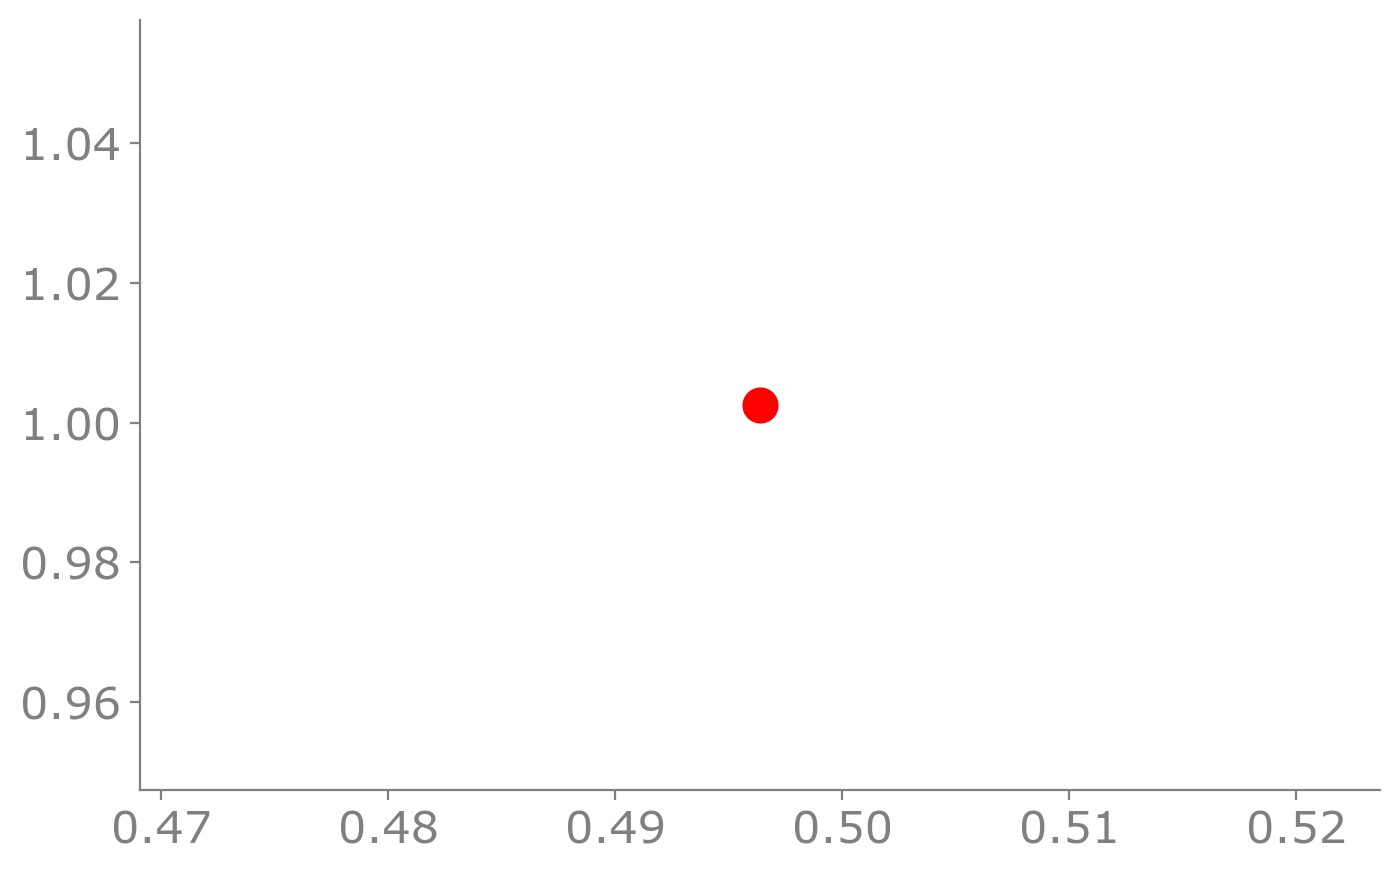

In [29]:
phi_epsilons = np.linspace(0.1, 1, 1000)
ones = np.array([1]*1000)
phi_1s, phi_2s = get_phi(n, q, Ks, d, phi_epsilons)
idx = np.argwhere(np.diff(np.sign(phi_1s - ones))).flatten()
plt.plot(phi_epsilons[idx], np.array(phi_1s)[idx], 'ro')

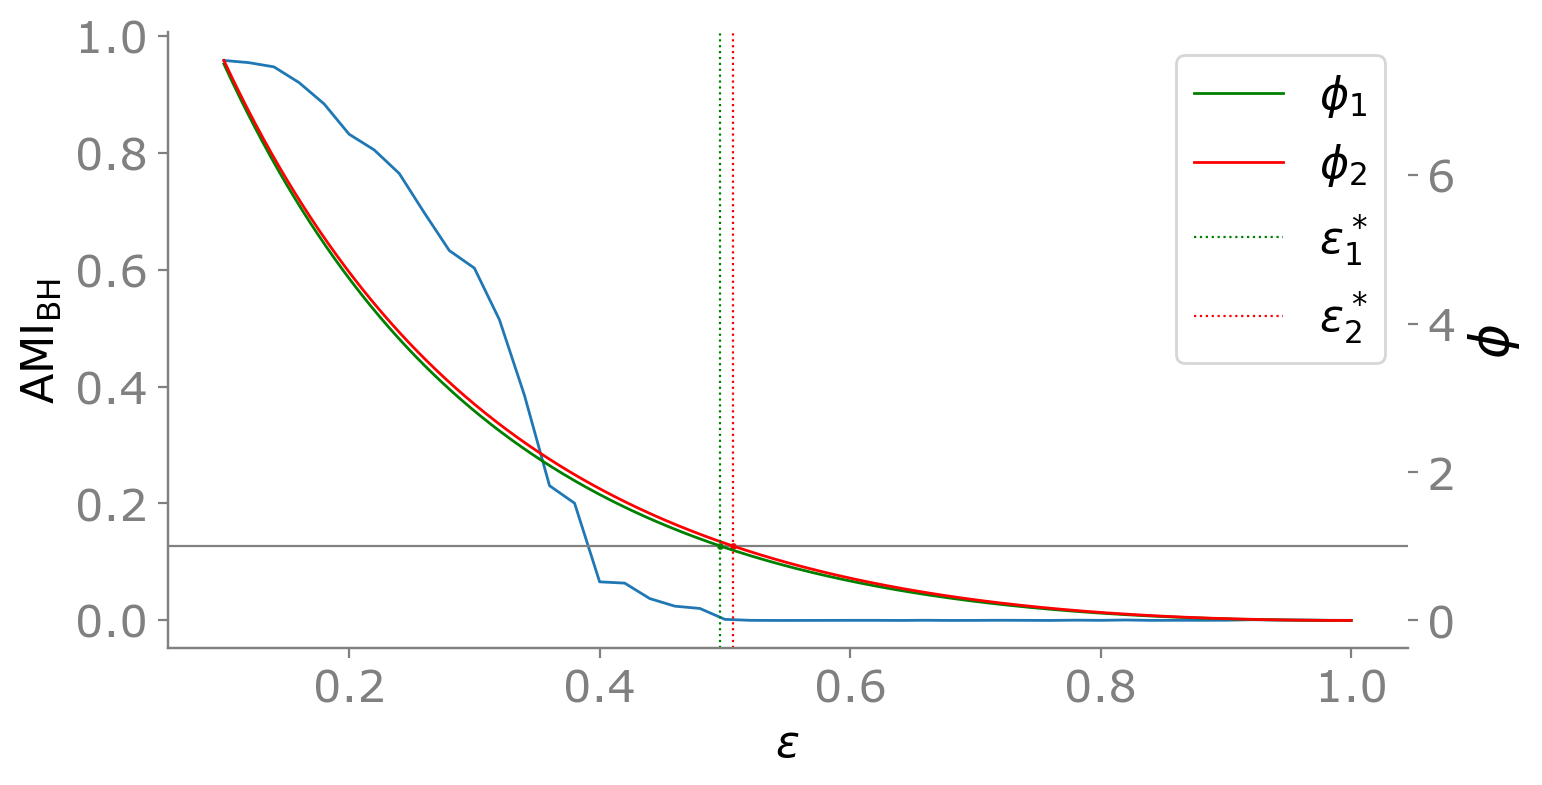

In [42]:
fig = plt.figure(figsize=(8, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = 51
ax.plot(epsilons[:select_number], results[0][:select_number], lw=1, label=r'\rm AMI_{BH}')
# plt.axvline(1, color='k', lw=1)
# plt.axvline(crit_epsilon, color='red', lw=0.8, ls=':')
ax.set_xlabel(r"$\epsilon$", fontsize=16)
ax.set_ylabel(r"$\rm AMI_{BH}$", fontsize=16)

ax_twin = ax.twinx()
phi_number = 1000
phi_epsilons = np.linspace(0.1, 1, phi_number)
ones = np.array([1]*phi_number)
phi_1s, phi_2s = get_phi(n, q, Ks, d, phi_epsilons)
idx_1 = np.argwhere(np.diff(np.sign(phi_1s - ones))).flatten() # cross point
idx_2 = np.argwhere(np.diff(np.sign(phi_2s - ones))).flatten() # cross point
ax_twin.axhline(1, color='gray', lw=0.8)
ax_twin.plot(phi_epsilons, phi_1s, linewidth=1, c='green', label=r'$\phi_1$')
ax_twin.plot(phi_epsilons, phi_2s, linewidth=1, c='red', label=r'$\phi_2$')
ax_twin.scatter(phi_epsilons[idx_1], np.array(phi_1s)[idx_1], s=2, c='green')
ax_twin.scatter(phi_epsilons[idx_2], np.array(phi_2s)[idx_2], s=2, c='red')
ax_twin.axvline(phi_epsilons[idx_1], color='green', lw=0.8, ls=':', label=r'$\epsilon_1^*$')
ax_twin.axvline(phi_epsilons[idx_2], color='red', lw=0.8, ls=':', label=r'$\epsilon_2^*$')
ax_twin.set_ylabel(r'$\phi$')

plt.legend()
save_path = "./_Figure/Hyper/" + "AMI_epsilon_nonuniform_k=2.pdf"
plt.savefig(save_path, dpi=600, bbox_inches='tight')

In [49]:
n = 150
q = 3
d = 15
Ks = (2, 3)
addtionTag = f'_40more'
fileId = 'amiExpHyper24.6.30' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH' + addtionTag
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
epsilons, results = read_exp(load_path=load_path)

In [14]:
phi_1s, phi_2s = get_phi(n, q, Ks, d, epsilons)

[8.1736445372809, 7.108343491606575, 6.202113772505304, 5.426824015849771, 4.760158520924451, 4.184246312632938, 3.684651042228136, 3.249617427311189, 2.869502609067474, 2.5363425001761346, 2.243517835966796, 1.9854946675613225, 1.7576209978413055, 1.5559661577360695, 1.3771930055028005, 1.2184555399111883, 1.0773163422227947, 0.9516796012009292, 0.8397364678887193, 0.7399202287185369, 0.6508693444877874, 0.5713968271603957, 0.5004647510566286, 0.4371629449608238, 0.3806911054242441, 0.3303437226434104, 0.28549732883374074, 0.24559967253376988, 0.21016049644417895, 0.17874365553118501, 0.15096035948693615, 0.1264633617574793, 0.10494194816343821, 0.08611760315573166, 0.06974025214271158, 0.05558499501587875, 0.04344925971312223, 0.033150315963949004, 0.02452309871539836, 0.01741829850318753, 0.011700682500810255, 0.007247615383546837, 0.00394775367332998, 0.0016998910369845279, 0.0004119352187928692, 0.0]
[8.429070929070928, 7.392630435066151, 6.504494245715229, 5.73841199762105, 5.073

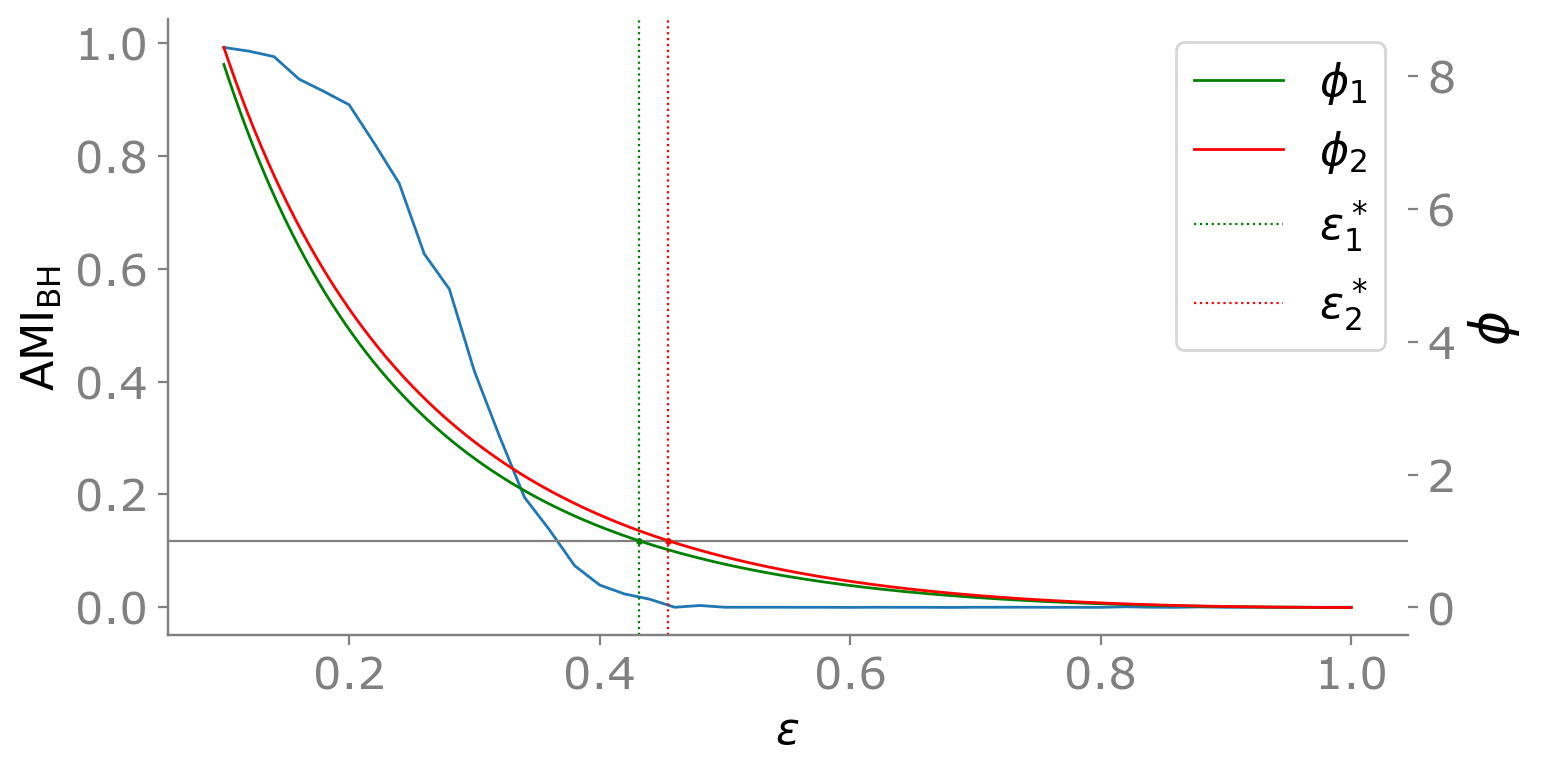

In [51]:
fig = plt.figure(figsize=(8, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = 51
ax.plot(epsilons[:select_number], results[0][:select_number], lw=1)
# plt.axvline(1, color='k', lw=1)
# plt.axvline(crit_epsilon, color='red', lw=0.8, ls=':')
ax.set_xlabel(r"$\epsilon$", fontsize=16)
ax.set_ylabel(r"$\rm AMI_{BH}$", fontsize=16)

ax_twin = ax.twinx()
phi_number = 1000
phi_epsilons = np.linspace(0.1, 1, phi_number)
ones = np.array([1]*phi_number)
phi_1s, phi_2s = get_phi(n, q, Ks, d, phi_epsilons)
idx_1 = np.argwhere(np.diff(np.sign(phi_1s - ones))).flatten() # cross point
idx_2 = np.argwhere(np.diff(np.sign(phi_2s - ones))).flatten() # cross point
ax_twin.axhline(1, color='gray', lw=0.8)
ax_twin.plot(phi_epsilons, phi_1s, linewidth=1, c='green', label=r'$\phi_1$')
ax_twin.plot(phi_epsilons, phi_2s, linewidth=1, c='red', label=r'$\phi_2$')
ax_twin.scatter(phi_epsilons[idx_1], np.array(phi_1s)[idx_1], s=2, c='green')
ax_twin.scatter(phi_epsilons[idx_2], np.array(phi_2s)[idx_2], s=2, c='red')
ax_twin.axvline(phi_epsilons[idx_1], color='green', lw=0.8, ls=':', label=r'$\epsilon_1^*$')
ax_twin.axvline(phi_epsilons[idx_2], color='red', lw=0.8, ls=':', label=r'$\epsilon_2^*$')
ax_twin.set_ylabel(r'$\phi$')
plt.legend()
save_path = "./_Figure/Hyper/" + "AMI_epsilon_nonuniform_k=3.pdf"
plt.savefig(save_path, dpi=600, bbox_inches='tight')